In [36]:
# 기본 라이브러리 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ML 라이브러리
import sklearn
from sklearn.svm import SVC
from sklearn.cluster import KMeans
# from sklearn.logg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Dataset
from sklearn.datasets import load_iris
# Encoder

import os


# AICentro
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.optimizers import RMSprop

In [38]:
from aicentro.session import Session
sacp_session = Session(verify=False)

from aicentro.framework.keras import Keras as SacpFrm
sacp_framework = SacpFrm(session=sacp_session)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.


In [2]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 10
pd.options.display.max_colwidth = 9999

In [3]:
somf_data = pd.read_csv('./ai_somf_sit_t2_202007021.csv', na_values = '0')
somf_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ORDER_SEQ_ID,ORDERNUMBER,BUSINESSCOMPONENTID,ORDERSTATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,FUCO,SWBO,MAUP,IDMS,MEIN,CEMS,MCID,DELS,VOIP,FUCF,ORCN
0,2800004,18079649556559N,1807964955655-17768442040,4,NaN,NaN,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDActivationReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,FulfillmentControllerReceiver_D_WaitingForResponse,NaN
1,2800328,18079659558499N,1807965955849-11857631630,4,NaN,NaN,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,FulfillmentControllerReceiver_D_WaitingForResponse,NaN
2,2801054,18079679571679N,1807967957167-11126575850,4,NaN,NaN,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDActivationReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,FulfillmentControllerReceiver_D_WaitingForResponse,NaN
3,2801056,18079679568549N,1807967956854-11176557750,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,FulfillmentControllerReceiver_D_WaitingForResponse,NaN
4,2801170,18079679569829N,1807967956982-11167658930,4,NaN,NaN,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDActivationReceiver_D_WaitingForResponse,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,FulfillmentControllerReceiver_D_WaitingForResponse,NaN


In [4]:
somf_functions = ['ORRE', 'PRDI', 'LORD', 'PHRD', 'RECO', 'WODI', 'REAC', 'JUJO', 'FUCO',
       'SWBO', 'MAUP', 'IDMS', 'MEIN', 'CEMS', 'MCID', 'DELS', 'VOIP', 'FUCF',
       'ORCN']

pna_functions = ['ORRE', 'PRDI', 'LORD', 'PHRD',
       'RECO', 'WODI', 'REAC', 'JUJO', 'SWBO', 'FUCO', 'MAUP', 'ORCN']

In [5]:
somf_data_pre = somf_data
somf_data_pre[somf_functions] = somf_data_pre[somf_functions].fillna('NONE_NONE_NONE')
somf_data_pre.head()

,ORDER_SEQ_ID,ORDERNUMBER,BUSINESSCOMPONENTID,ORDERSTATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,FUCO,SWBO,MAUP,IDMS,MEIN,CEMS,MCID,DELS,VOIP,FUCF,ORCN
0,2800004,18079649556559N,1807964955655-17768442040,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
1,2800328,18079659558499N,1807965955849-11857631630,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
2,2801054,18079679571679N,1807967957167-11126575850,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
3,2801056,18079679568549N,1807967956854-11176557750,4,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
4,2801170,18079679569829N,1807967956982-11167658930,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE


In [6]:
somf_data_pre = somf_data
somf_data_pre[somf_functions] = somf_data_pre[somf_functions].fillna('NONE_NONE_NONE')
somf_data_pre.head()

,ORDER_SEQ_ID,ORDERNUMBER,BUSINESSCOMPONENTID,ORDERSTATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,FUCO,SWBO,MAUP,IDMS,MEIN,CEMS,MCID,DELS,VOIP,FUCF,ORCN
0,2800004,18079649556559N,1807964955655-17768442040,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
1,2800328,18079659558499N,1807965955849-11857631630,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
2,2801054,18079679571679N,1807967957167-11126575850,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
3,2801056,18079679568549N,1807967956854-11176557750,4,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
4,2801170,18079679569829N,1807967956982-11167658930,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE


In [7]:
tasks_list = list()

for function in somf_functions:
    temp_list = list(somf_data_pre.groupby([function])[function].count().index)
    for task in temp_list:
        tasks_list.append(task)
                
tasks_set = set(tasks_list)
tasks_dict = {j : i for i,j in enumerate(tasks_set)}

In [8]:
# data = [tasks_dict[i] for i in somf_data_pre['ORRE'].tolist()]

for function in somf_functions:
    somf_data_pre[function] = [tasks_dict[i] for i in somf_data_pre[function].tolist()]

somf_data_pre

,ORDER_SEQ_ID,ORDERNUMBER,BUSINESSCOMPONENTID,ORDERSTATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,FUCO,SWBO,MAUP,IDMS,MEIN,CEMS,MCID,DELS,VOIP,FUCF,ORCN
0,2800004,18079649556559N,1807964955655-17768442040,4,29,29,34,29,29,29,29,29,29,29,29,57,29,29,29,29,29,28,29
1,2800328,18079659558499N,1807965955849-11857631630,4,29,29,34,29,29,29,29,29,29,29,29,60,38,29,29,29,29,28,29
2,2801054,18079679571679N,1807967957167-11126575850,4,29,29,34,29,29,29,29,29,29,29,29,57,29,29,29,29,29,28,29
3,2801056,18079679568549N,1807967956854-11176557750,4,29,29,29,29,29,29,29,29,29,29,29,60,38,29,29,29,29,28,29
4,2801170,18079679569829N,1807967956982-11167658930,4,29,29,34,29,29,29,29,29,29,29,29,57,38,29,29,29,29,28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37461,4956954,201849G0226669N,201849G0226669N,4,29,6,29,29,29,29,29,29,29,29,29,29,29,29,29,42,46,28,29
37462,4956956,201849I0227509N,201849I0227509N,4,29,6,29,29,29,29,29,29,29,29,29,29,29,29,29,42,46,28,29
37463,4956960,201849K0228879N,201849K0228879N,4,29,6,29,29,29,29,29,29,29,29,29,29,29,29,29,42,46,28,29
37464,4956962,20181EG7125899N,20181EG7125899N,4,29,6,29,29,29,29,29,29,29,29,29,57,29,29,29,29,29,28,29


In [9]:
# somf_data['ORRE1'] = [tasks_dict.get(somf_data['ORRE'][0]), mode_dict.get(somf_data['ORRE'][1]), state_dict.get(somf_data['ORRE'][2])]
# somf_data['ORRE1'] = [tasks_dict.get(somf_data['ORRE'].iloc[:,0]), mode_dict.get(somf_data['ORRE'][1]), state_dict.get(somf_data['ORRE'][2])]

one_somf_enc = OneHotEncoder(dtype=int)
somf_data_pre_onehot = somf_data_pre.join(pd.DataFrame(one_somf_enc.fit_transform(somf_data_pre[somf_functions]).toarray()))
somf_data_pre_onehot.head()

,ORDER_SEQ_ID,ORDERNUMBER,BUSINESSCOMPONENTID,ORDERSTATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,FUCO,SWBO,MAUP,IDMS,MEIN,CEMS,MCID,DELS,VOIP,FUCF,ORCN,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,2800004,18079649556559N,1807964955655-17768442040,4,29,29,34,29,29,29,29,29,29,29,29,57,29,29,29,29,29,28,29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
1,2800328,18079659558499N,1807965955849-11857631630,4,29,29,34,29,29,29,29,29,29,29,29,60,38,29,29,29,29,28,29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
2,2801054,18079679571679N,1807967957167-11126575850,4,29,29,34,29,29,29,29,29,29,29,29,57,29,29,29,29,29,28,29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
3,2801056,18079679568549N,1807967956854-11176557750,4,29,29,29,29,29,29,29,29,29,29,29,60,38,29,29,29,29,28,29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
4,2801170,18079679569829N,1807967956982-11167658930,4,29,29,34,29,29,29,29,29,29,29,29,57,38,29,29,29,29,28,29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0


In [10]:
somf_defect = pd.read_csv('./ai_somf_sit_defect_202007021.csv', na_values = '0')
somf_defect = somf_defect[['ORDER_SEQ_ID', 'LABEL']]

In [11]:
somf_data_pre_wDefect = somf_data_pre_onehot.merge(somf_defect, left_on='ORDER_SEQ_ID', right_on='ORDER_SEQ_ID', how='left', sort=True)

In [12]:
label_set = set(somf_data_pre_wDefect['LABEL'])
label_dict = {j : i for i,j in enumerate(label_set)}

In [13]:
somf_data_pre_wDefect['LABEL'] = [label_dict[i] for i in somf_data_pre_wDefect['LABEL'].tolist()]

In [14]:
somf_data_pre_wDefect_inputColumn = ['ORDERSTATE',
       'ORRE', 'PRDI', 'LORD', 'PHRD', 'RECO', 'WODI', 'REAC', 'JUJO', 'FUCO',
       'SWBO', 'MAUP', 'IDMS', 'MEIN', 'CEMS', 'MCID', 'DELS', 'VOIP', 'FUCF',
       'ORCN']
x_data = somf_data_pre_wDefect[somf_data_pre_wDefect_inputColumn]
y_data = somf_data_pre_wDefect['LABEL']

In [15]:
pna_data = pd.read_csv('./ai_pna_sit_t2_202007021.csv')
pna_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CUST_ORDR_NO,ORDR_COMPOSI_IDFY_ID,ORDR_TYPE_ID,PROD_ID,FIRST_CRET_DT,LAST_CHG_DT,CUST_ORDR_VER_NO,OPN_HOPE_DATE,RMVL_HOPE_DATE,ICIS_CMPLN_DATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,SWBO,FUCO,MAUP,ORCN
0,09354A400824790,09354A4008247-10259364790,O2,0822,20/01/13,20/01/13,8,09/12/22,NaN,NaN,ORRE_2_OKEY,PRDI_0_OKEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09355I026668290,09355I0266682-11854166130,OA,0928,20/03/26,20/03/26,5,20/03/28,NaN,NaN,ORRE_2_OKEY,PRDI_0_OKEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10062F021795490,10062F0217954-11934637900,OA,0928,20/03/26,20/03/26,18,20/03/31,NaN,NaN,ORRE_2_OKEY,PRDI_0_OKEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103395001817690,1033950018176-60075682270,O2,0799,20/01/13,20/01/13,13,10/12/07,NaN,NaN,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NaN,NaN,NaN,REAC_3_REAC004,NaN,NaN,NaN,NaN,NaN
4,11008E508087991,11008E508087991,SI,0V02,20/01/21,20/01/21,1,20/01/23,NaN,NaN,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
pna_data_pre = pna_data.copy()

### null 처리
pna_data_pre.OPN_HOPE_DATE.fillna(pna_data_pre.RMVL_HOPE_DATE, inplace = True) 
pna_data_pre.RMVL_HOPE_DATE.fillna(pna_data_pre.OPN_HOPE_DATE, inplace = True) 
# pna_data_pre.ICIS_CMPLN_DATE.fillna('99/01/01', inplace = True) 

pna_data_pre[pna_functions] = pna_data_pre[pna_functions].fillna('NONE_NONE_NONE')

### datetime 처리
pna_data_pre.OPN_HOPE_DATE = pd.to_datetime(pna_data_pre.OPN_HOPE_DATE, format = '%y/%m/%d')
pna_data_pre.RMVL_HOPE_DATE = pd.to_datetime(pna_data_pre.RMVL_HOPE_DATE, format = '%y/%m/%d')
pna_data_pre.ICIS_CMPLN_DATE = pd.to_datetime(pna_data_pre.ICIS_CMPLN_DATE, format = '%y/%m/%d')

pna_data_pre.head()


,CUST_ORDR_NO,ORDR_COMPOSI_IDFY_ID,ORDR_TYPE_ID,PROD_ID,FIRST_CRET_DT,LAST_CHG_DT,CUST_ORDR_VER_NO,OPN_HOPE_DATE,RMVL_HOPE_DATE,ICIS_CMPLN_DATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,SWBO,FUCO,MAUP,ORCN
0,09354A400824790,09354A4008247-10259364790,O2,0822,20/01/13,20/01/13,8,2009-12-22,2009-12-22,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE
1,09355I026668290,09355I0266682-11854166130,OA,0928,20/03/26,20/03/26,5,2020-03-28,2020-03-28,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE
2,10062F021795490,10062F0217954-11934637900,OA,0928,20/03/26,20/03/26,18,2020-03-31,2020-03-31,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE
3,103395001817690,1033950018176-60075682270,O2,0799,20/01/13,20/01/13,13,2010-12-07,2010-12-07,NaT,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,REAC_3_REAC004,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE
4,11008E508087991,11008E508087991,SI,0V02,20/01/21,20/01/21,1,2020-01-23,2020-01-23,NaT,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE


In [17]:
order_type_set = set(pna_data_pre['ORDR_TYPE_ID'])
orderType_dict = {j : i for i,j in enumerate(order_type_set)}

PROD_ID_set = set(pna_data_pre['PROD_ID'])
PROD_ID_dict = {j : i for i,j in enumerate(PROD_ID_set)}

In [18]:
pna_data_pre['ORDR_TYPE_ID'] = [orderType_dict[i] for i in pna_data_pre['ORDR_TYPE_ID'].tolist()]
pna_data_pre['PROD_ID'] = [PROD_ID_dict[i] for i in pna_data_pre['PROD_ID'].tolist()]

pna_data_pre

,CUST_ORDR_NO,ORDR_COMPOSI_IDFY_ID,ORDR_TYPE_ID,PROD_ID,FIRST_CRET_DT,LAST_CHG_DT,CUST_ORDR_VER_NO,OPN_HOPE_DATE,RMVL_HOPE_DATE,ICIS_CMPLN_DATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,SWBO,FUCO,MAUP,ORCN
0,09354A400824790,09354A4008247-10259364790,73,18,20/01/13,20/01/13,8,2009-12-22,2009-12-22,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE
1,09355I026668290,09355I0266682-11854166130,20,51,20/03/26,20/03/26,5,2020-03-28,2020-03-28,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE
2,10062F021795490,10062F0217954-11934637900,20,51,20/03/26,20/03/26,18,2020-03-31,2020-03-31,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE
3,103395001817690,1033950018176-60075682270,73,55,20/01/13,20/01/13,13,2010-12-07,2010-12-07,NaT,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,REAC_3_REAC004,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE
4,11008E508087991,11008E508087991,99,65,20/01/21,20/01/21,1,2020-01-23,2020-01-23,NaT,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41382,TESTSLCLI609996,TESTSLCLI609996,1,66,20/06/05,20/06/12,11,2020-05-29,2020-05-29,2020-06-12,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,MAUP_2_OKEY,ORCN_2_OKEY
41383,TESTSLCLI609997,TESTSLCLI609997,1,66,20/06/05,20/06/05,11,2020-05-29,2020-05-29,NaT,ORRE_2_OKEY,PRDI_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE
41384,TESTSLCLI609998,TESTSLCLI609998,1,66,20/06/05,20/06/05,11,2020-05-29,2020-05-29,NaT,ORRE_2_OKEY,PRDI_2_OKEY,LORD_3_LORD997,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE
41385,TESTSLCLI609999,TESTSLCLI609999,1,66,20/06/05,20/06/12,11,2020-05-29,2020-05-29,2020-06-12,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,MAUP_2_OKEY,ORCN_2_OKEY


In [19]:
one_pna_enc = OneHotEncoder()
pna_data_pre_onehot =pna_data_pre.join(pd.DataFrame(one_pna_enc.fit_transform(pna_data_pre[pna_functions]).toarray()))
pna_data_pre_onehot.head()

,CUST_ORDR_NO,ORDR_COMPOSI_IDFY_ID,ORDR_TYPE_ID,PROD_ID,FIRST_CRET_DT,LAST_CHG_DT,CUST_ORDR_VER_NO,OPN_HOPE_DATE,RMVL_HOPE_DATE,ICIS_CMPLN_DATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,SWBO,FUCO,MAUP,ORCN,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185
0,09354A400824790,09354A4008247-10259364790,73,18,20/01/13,20/01/13,8,2009-12-22,2009-12-22,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,09355I026668290,09355I0266682-11854166130,20,51,20/03/26,20/03/26,5,2020-03-28,2020-03-28,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10062F021795490,10062F0217954-11934637900,20,51,20/03/26,20/03/26,18,2020-03-31,2020-03-31,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,103395001817690,1033950018176-60075682270,73,55,20/01/13,20/01/13,13,2010-12-07,2010-12-07,NaT,ORRE_2_OKEY,PRDI_2_OKE

In [60]:
somf_pna_data = somf_data_pre_wDefect.merge(pna_data_pre_onehot, left_on='BUSINESSCOMPONENTID', right_on='ORDR_COMPOSI_IDFY_ID', suffixes = ('_S','_P'),  how='left',  sort=True)
somf_pna_data[17000:17005]

,ORDER_SEQ_ID,ORDERNUMBER,BUSINESSCOMPONENTID,ORDERSTATE,ORRE_S,PRDI_S,LORD_S,PHRD_S,RECO_S,WODI_S,REAC_S,JUJO_S,FUCO_S,SWBO_S,MAUP_S,IDMS,MEIN,CEMS,MCID,DELS,VOIP,FUCF,ORCN_S,0_S,1_S,2_S,3_S,4_S,5_S,6_S,7_S,8_S,9_S,10_S,11_S,12_S,13_S,14_S,15_S,16_S,17_S,18_S,19_S,20_S,21_S,22_S,23_S,24_S,25_S,26_S,27_S,28_S,29_S,30_S,31_S,32_S,33_S,34_S,35_S,36_S,37_S,38_S,39_S,40_S,41_S,42_S,43_S,44_S,45_S,46_S,47_S,48_S,49_S,50_S,51_S,52_S,53_S,54_S,55_S,56_S,57_S,58_S,59_S,60_S,61_S,62_S,63_S,64_S,65_S,66_S,67_S,68_S,69_S,70_S,71_S,72_S,73_S,74_S,75_S,76_S,77_S,78_S,79_S,80_S,81_S,82_S,83_S,84_S,85_S,86_S,87_S,88_S,89_S,90_S,91_S,92_S,93_S,94_S,95_S,96_S,97_S,98_S,LABEL,CUST_ORDR_NO,ORDR_COMPOSI_IDFY_ID,ORDR_TYPE_ID,PROD_ID,FIRST_CRET_DT,LAST_CHG_DT,CUST_ORDR_VER_NO,OPN_HOPE_DATE,RMVL_HOPE_DATE,ICIS_CMPLN_DATE,ORRE_P,PRDI_P,LORD_P,PHRD_P,RECO_P,WODI_P,REAC_P,JUJO_P,SWBO_P,FUCO_P,MAUP_P,ORCN_P,0_P,1_P,2_P,3_P,4_P,5_P,6_P,7_P,8_P,9_P,10_P,11_P,12_P,13_P,14_P,15_P,16_P,17_P,18_P,19_P,20_P,21_P,22_P,23_P,24_P,25_P,26_P,27_P,28_P,29_P,30_P,31_P,32_P,33_P,34_P,35_P,36_P,37_P,38_P,39_P,40_P,41_P,42_P,43_P,44_P,45_P,46_P,47_P,48_P,49_P,50_P,51_P,52_P,53_P,54_P,55_P,56_P,57_P,58_P,59_P,60_P,61_P,62_P,63_P,64_P,65_P,66_P,67_P,68_P,69_P,70_P,71_P,72_P,73_P,74_P,75_P,76_P,77_P,78_P,79_P,80_P,81_P,82_P,83_P,84_P,85_P,86_P,87_P,88_P,89_P,90_P,91_P,92_P,93_P,94_P,95_P,96_P,97_P,98_P,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185
17000,4277091,20150FI5539449N,20150FI553944-10978047390,4,29,6,29,29,29,29,29,29,29,29,29,57,29,29,29,29,29,28,29,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,20150FI5539449N,20150FI553944-10978047390,73.0,18.0,20/05/29,20/05/29,46.0,2020-05-30,2020-05-30,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17001,4923682,20150FI5539459N,20150FI553945-67042517942,4,29,6,29,29,29,29,29,29,29,29,29,57,29,29,29,29,29,28,29,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,20150FI5539459N,20150FI553945-67042517942,73.0,54.0,20/05/29,20/05/29,10.0,2020-05-29,2020-05-29,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

In [21]:
column_list = list()

column_list.append('ORDERSTATE')
column_list.append('ORDR_TYPE_ID')
column_list.append('PROD_ID')

for i in somf_pna_data.columns:
    if(isinstance(i, int)):
        column_list.append(i)
    else:
        if(i[0:1].isnumeric()):
            column_list.append(i)

y_data = somf_pna_data['LABEL']
y_data = keras.utils.to_categorical(y_data, 6)

In [22]:
x_data = somf_pna_data[column_list].fillna('0')

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [24]:
model = sklearn.tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

result = model.predict(x_test)
accuracy = metrics.accuracy_score(result, y_test)
accuracy

0.994564058836069

In [29]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(28146, 288) (28146, 6) (9382, 288) (9382, 6)


### DL

In [30]:
# 데이터 shape 을 확인해 봅니다.
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
in_batch_size = 5000
in_epochs = 100
num_class = 6


(28146, 288) (28146, 6) (9382, 288) (9382, 6)


In [33]:
model = Sequential()
model.add(Dense(360, activation='tanh', input_shape=(288,)))
model.add(Dropout(0.5))
model.add(Dense(180, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(num_class, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(0.003),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 360)               104040    
_________________________________________________________________
dropout_6 (Dropout)          (None, 360)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 180)               64980     
_________________________________________________________________
dropout_7 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                5792      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                

In [34]:
history = model.fit(x_train, y_train,
                    batch_size=in_batch_size,
                    epochs=in_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 28146 samples, validate on 9382 samples
Epoch 1/100
28146/28146 [==============================] - 2s 80us/sample - loss: 1.1095 - acc: 0.5999 - val_loss: 0.5585 - val_acc: 0.7740
Epoch 2/100
28146/28146 [==============================] - 2s 65us/sample - loss: 0.7594 - acc: 0.7418 - val_loss: 0.4526 - val_acc: 0.9158
Epoch 3/100
28146/28146 [==============================] - 2s 62us/sample - loss: 0.6369 - acc: 0.7996 - val_loss: 0.3784 - val_acc: 0.9147
Epoch 4/100
28146/28146 [==============================] - 2s 72us/sample - loss: 0.4771 - acc: 0.8772 - val_loss: 0.5230 - val_acc: 0.8361
Epoch 5/100
28146/28146 [==============================] - 2s 60us/sample - loss: 0.4664 - acc: 0.8860 - val_loss: 0.2998 - val_acc: 0.9282
Epoch 6/100
28146/28146 [==============================] - 2s 64us/sample - loss: 0.4494 - acc: 0.8869 - val_loss: 0.2771 - val_acc: 0.9302
Epoch 7/100
28146/28146 [==============================] - 2s 59us/sample - loss: 0.3402 - acc: 0.9308 - val_lo

In [52]:
list(label_dict.keys())

[nan, 'OPE', 'ORRE_PENDING', 'ACCEPT', 'RECEIVED', 'ORP']

In [53]:
y_test_pred = model.predict(x_test, batch_size=128, verbose=1)
y_label = list(label_dict.keys())

y_test_c = np.argmax(y_test, axis=1).reshape(-1, 1)
y_test_pred_c = np.argmax(y_test_pred, axis=1).reshape(-1, 1)

9382/9382 [==============================] - 0s 35us/sample


In [54]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026003619301906346
Test accuracy: 0.9949904


In [55]:
sacp_framework.save_model(model, model_name='ai-assistant')

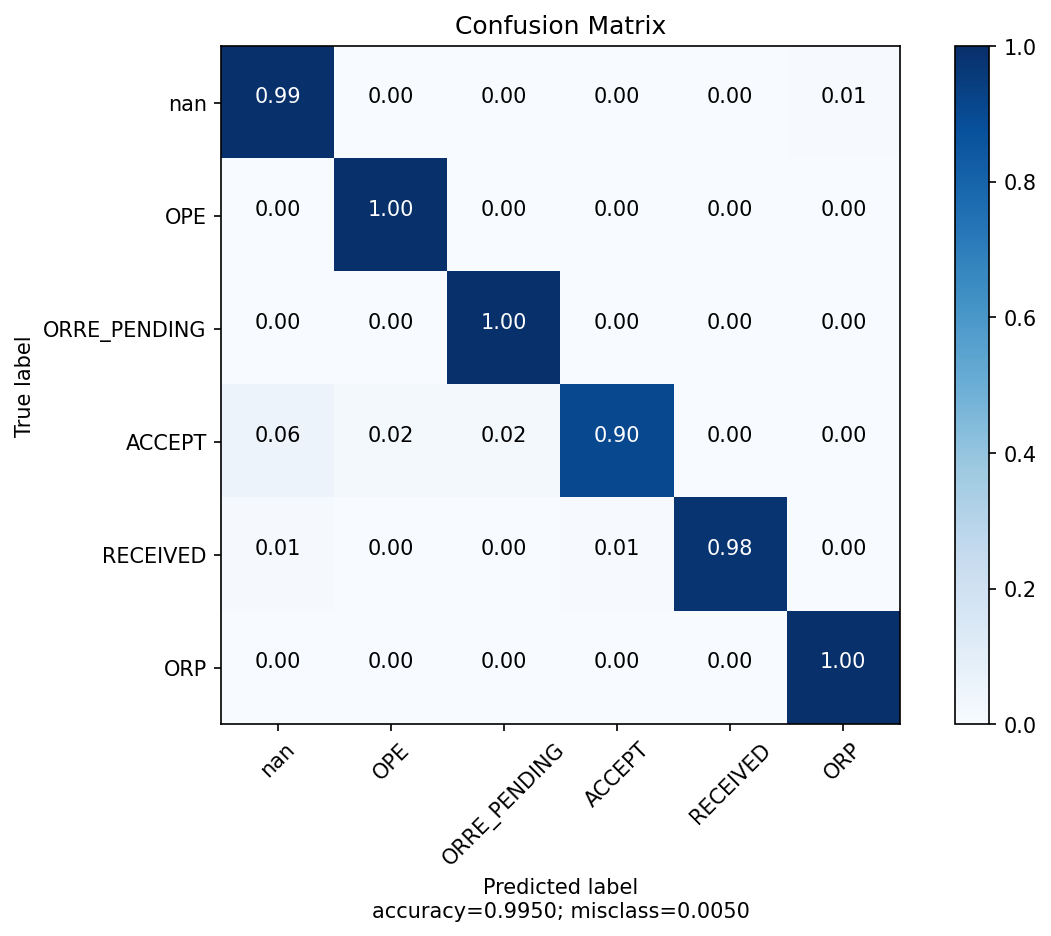

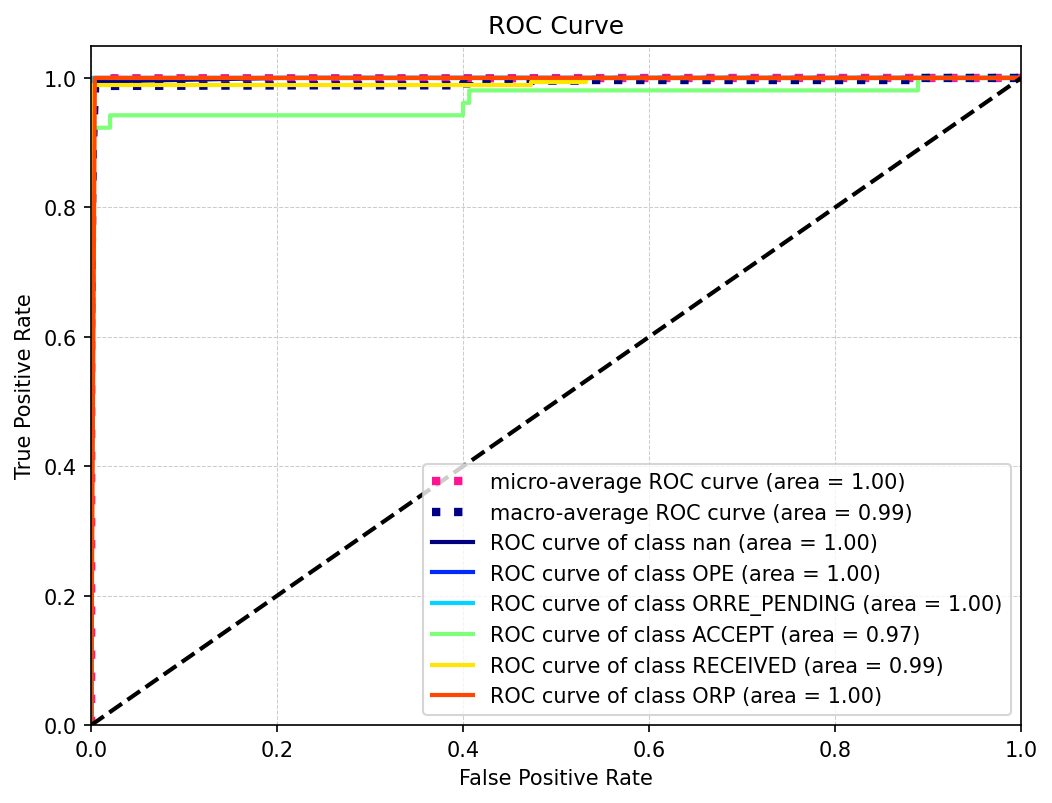

In [56]:
sacp_framework.plot_confusion_matrix(y_test_c, y_test_pred_c, target_names=y_label, title='Confusion Matrix')
sacp_framework.classification_report(y_test_c, y_test_pred_c, target_names=y_label)
sacp_framework.plot_roc_curve(y_test, y_test_pred, len(y_label), y_label)

,ORDER_SEQ_ID,ORDERNUMBER,BUSINESSCOMPONENTID,ORDERSTATE,ORRE_S,PRDI_S,LORD_S,PHRD_S,RECO_S,WODI_S,REAC_S,JUJO_S,FUCO_S,SWBO_S,MAUP_S,IDMS,MEIN,CEMS,MCID,DELS,VOIP,FUCF,ORCN_S,0_S,1_S,2_S,3_S,4_S,5_S,6_S,7_S,8_S,9_S,10_S,11_S,12_S,13_S,14_S,15_S,16_S,17_S,18_S,19_S,20_S,21_S,22_S,23_S,24_S,25_S,26_S,27_S,28_S,29_S,30_S,31_S,32_S,33_S,34_S,35_S,36_S,37_S,38_S,39_S,40_S,41_S,42_S,43_S,44_S,45_S,46_S,47_S,48_S,49_S,50_S,51_S,52_S,53_S,54_S,55_S,56_S,57_S,58_S,59_S,60_S,61_S,62_S,63_S,64_S,65_S,66_S,67_S,68_S,69_S,70_S,71_S,72_S,73_S,74_S,75_S,76_S,77_S,78_S,79_S,80_S,81_S,82_S,83_S,84_S,85_S,86_S,87_S,88_S,89_S,90_S,91_S,92_S,93_S,94_S,95_S,96_S,97_S,98_S,LABEL,CUST_ORDR_NO,ORDR_COMPOSI_IDFY_ID,ORDR_TYPE_ID,PROD_ID,FIRST_CRET_DT,LAST_CHG_DT,CUST_ORDR_VER_NO,OPN_HOPE_DATE,RMVL_HOPE_DATE,ICIS_CMPLN_DATE,ORRE_P,PRDI_P,LORD_P,PHRD_P,RECO_P,WODI_P,REAC_P,JUJO_P,SWBO_P,FUCO_P,MAUP_P,ORCN_P,0_P,1_P,2_P,3_P,4_P,5_P,6_P,7_P,8_P,9_P,10_P,11_P,12_P,13_P,14_P,15_P,16_P,17_P,18_P,19_P,20_P,21_P,22_P,23_P,24_P,25_P,26_P,27_P,28_P,29_P,30_P,31_P,32_P,33_P,34_P,35_P,36_P,37_P,38_P,39_P,40_P,41_P,42_P,43_P,44_P,45_P,46_P,47_P,48_P,49_P,50_P,51_P,52_P,53_P,54_P,55_P,56_P,57_P,58_P,59_P,60_P,61_P,62_P,63_P,64_P,65_P,66_P,67_P,68_P,69_P,70_P,71_P,72_P,73_P,74_P,75_P,76_P,77_P,78_P,79_P,80_P,81_P,82_P,83_P,84_P,85_P,86_P,87_P,88_P,89_P,90_P,91_P,92_P,93_P,94_P,95_P,96_P,97_P,98_P,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185
0,2891258,092085000164990,0920850001649-10819029200,4,29,29,34,29,29,29,29,29,29,29,29,19,29,29,29,29,29,28,29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4247466,09354A400824790,09354A4008247-10259364790,4,29,6,29,29,29,29,29,29,29,29,29,19,29,29,29,29,29,28,29,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,09354A400824790,09354A4008247-10259364790,73.0,18.0,20/01/13,20/01/13,8.0,2009-12-22,2009-12-22,NaT,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0